<a href="https://colab.research.google.com/github/sungjindo/black_coal_price/blob/main/ARIMA_1%EC%B0%A8_%EC%B0%A8%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot #plotly offline mode 
init_notebook_mode(connected = True)
import plotly.graph_objs as go #plotly graphical object
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score    # validation  검증 라이브러리
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 라이브러리
from sklearn.linear_model import Lasso    # 라쏘 라이브러리
from sklearn.linear_model import Ridge    # 릿지 라이브러리
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from sklearn.ensemble import RandomForestClassifier    # 랜덤포레스트 라이브러리
import warnings    # 경고문구 지우기
warnings.filterwarnings("ignore")
plt.style.use('ggplot') #style of plots. ggplot is one of the most used style.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## colmns 정리

In [3]:
df = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/blackcoal_combine.csv", encoding = 'utf-8-sig')

In [4]:
df

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,China_Electricity from wind (TWh),China_Electricity from nuclear (TWh),India_Electricity from coal (TWh),India_Electricity from gas (TWh),India_Electricity from hydro (TWh),India_Electricity from other renewables including bioenergy (TWh),India_Electricity from solar (TWh),India_Electricity from oil (TWh),India_Electricity from wind (TWh),India_Electricity from nuclear (TWh)
0,2019-12-29,67.50,93.41,68.60,6129.5,63.05,63.10,33.07,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22


In [5]:
# df= df.rename(columns={'Unnamed: 0':'date'})

In [6]:
# 전체 컬럼명 확인

#pd.set_option('display.max_seq_items', 10)
col_names = df.columns.tolist()
print(df.columns)

Index(['date', 'Coal_price', 'iron', 'Brent_fut', 'copper_fut', 'WTI_fut',
       'WTI', 'LNG_fut', 'KPPI', 'ACPI', 'KCPI', 'APPI', 'APPI2', 'bdi',
       'South Korea_Electricity from coal (TWh)',
       'South Korea_Electricity from gas (TWh)',
       'South KoreaElectricity from hydro (TWh)',
       'South Korea_Electricity from other renewables including bioenergy (TWh)',
       'South Korea_Electricity from solar (TWh)',
       'South Korea_Electricity from oil (TWh)',
       'South Korea_Electricity from wind (TWh)',
       'South Korea_Electricity from nuclear (TWh)',
       'Japan_Electricity from coal (TWh)', 'Japan_Electricity from gas (TWh)',
       'Japan_Electricity from hydro (TWh)',
       'Japan_Electricity from other renewables including bioenergy (TWh)',
       'Japan_Electricity from solar (TWh)',
       'Japan_Electricity from oil (TWh)', 'Japan_Electricity from wind (TWh)',
       'Japan_Electricity from nuclear (TWh)',
       'China_Electricity from coal (TWh)', '

In [7]:
col_names = pd.DataFrame(col_names)
col_names

,0
0,date
1,Coal_price
2,iron
3,Brent_fut
4,copper_fut
5,WTI_fut
6,WTI
7,LNG_fut
8,KPPI
9,ACPI


In [8]:
col_names.to_csv('/content/gdrive/My Drive/Black_coal/data/dataset/blackcoal_colname.csv', index = True, encoding = 'utf-8-sig')

# 1차 차분 (for문 사용)
 정상성을 만족하는 데이터 만들기

## stationary 시각화 확인

In [ ]:
df_down_d.to_csv('/content/gdrive/My Drive/Black_coal/data/blackcoal_y_w.csv', index = False, encoding = 'utf-8-sig')

<Figure size 432x288 with 0 Axes>

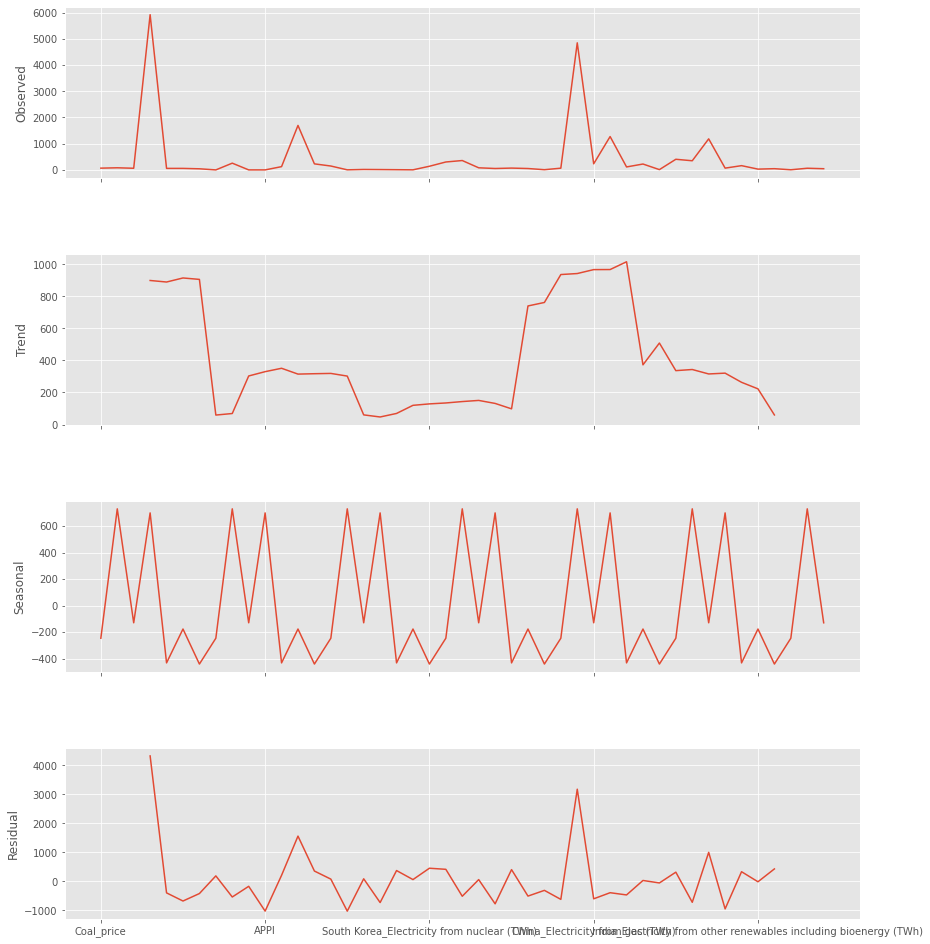

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1.iloc[8], model='additive', freq =7)
# freq에 들어가는 주기는 계절성을 주기를 기반으로 설정해준다. 분기별은 4, 월별데이터는 12, 주별 패턴이 있는 일별 데이터는 7로 설정해서 보면서 맞춰가야함/1년이면 365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

In [ ]:
# 패턴이 보인다면 정상성이 의심된다. 이를 판단하기 위해서 ACF그래프 그려본다

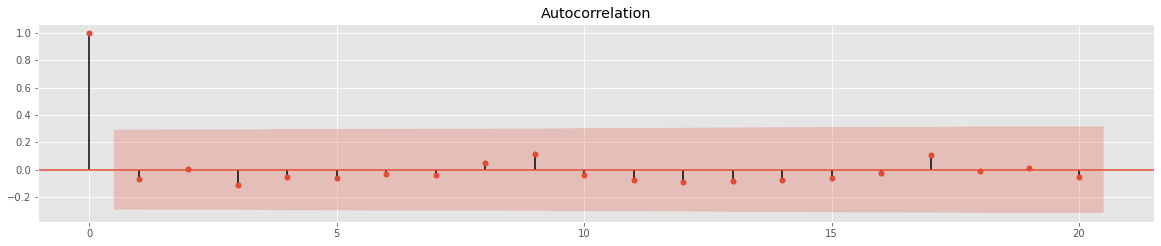

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1.iloc[8], lags=20, ax=ax1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1.iloc[0])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print ('Wt%s: %.3f' % (key, value))

ADF Statistic: -6.916766
p-value: 0.000000
Critical Values:
Wt1%: -3.589
Wt5%: -2.930
Wt10%: -2.603


In [ ]:
df1.iloc[:,[0]]

,Coal_price
date,
2019-12-29,67.50
2019-12-22,66.55
2019-12-15,66.35
2019-12-08,66.30
2019-12-01,66.40
...,...
2011-01-30,127.00
2011-01-23,130.35
2011-01-16,131.90


In [ ]:
# p-valu가 0.05를 넘으므로, 귀무가설을 기각하지 못한다. (정상성만족 x)
# 이를 해결하기 위해 1차 차분



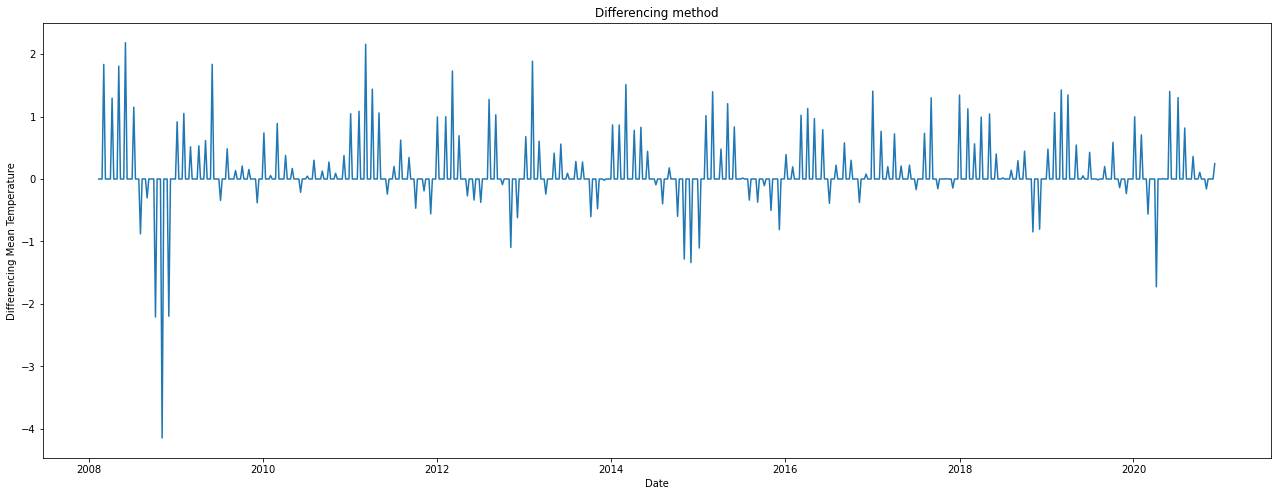

In [ ]:
ts_diff = df_up['ACPI'] - df_up['ACPI'].shift()
plt.figure(figsize=(22,8))
plt.plot(ts_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [ ]:
result = adfuller(ts_diff[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print ('Wt%s: %.3f' % (key, value))

ADF Statistic: -7.582357
p-value: 0.000000
Critical Values:
Wt1%: -3.440
Wt5%: -2.866
Wt10%: -2.569


In [ ]:
df_price = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/가격데이터.csv", encoding = 'utf-8-sig')

In [ ]:
df_price

,Unnamed: 0,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,Dubai,LNG_fut
0,0,2022-05-22,408.00,133.99,111.75,9453.5,110.98,112.44,107.17,136.67
1,1,2022-05-15,417.25,133.66,112.55,9422.0,113.23,112.04,107.21,147.96
2,2,2022-05-08,392.85,132.33,111.55,9159.0,110.49,110.30,107.23,148.45
3,3,2022-05-01,379.50,136.91,112.39,9414.5,109.77,110.95,107.57,137.50
4,4,2022-04-24,326.60,150.77,109.34,9769.5,104.69,104.78,102.79,163.68
...,...,...,...,...,...,...,...,...,...,...
698,698,2009-01-04,75.07,NaN,44.42,NaN,40.83,40.92,NaN,56.42
699,699,2008-12-28,74.01,NaN,46.91,NaN,46.34,46.16,NaN,54.74
700,700,2008-12-21,73.09,NaN,38.37,NaN,37.71,37.59,NaN,59.80
701,701,2008-12-14,73.29,NaN,44.00,NaN,33.87,35.89,NaN,59.11


## test

In [9]:
df1 = pd.read_csv("/content/gdrive/My Drive/Black_coal/data/dataset/blackcoal_combine.csv", encoding = 'utf-8-sig')
df1

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,China_Electricity from wind (TWh),China_Electricity from nuclear (TWh),India_Electricity from coal (TWh),India_Electricity from gas (TWh),India_Electricity from hydro (TWh),India_Electricity from other renewables including bioenergy (TWh),India_Electricity from solar (TWh),India_Electricity from oil (TWh),India_Electricity from wind (TWh),India_Electricity from nuclear (TWh)
0,2019-12-29,67.50,93.41,68.60,6129.5,63.05,63.10,33.07,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
1,2019-12-22,66.55,91.55,68.16,6214.0,61.72,61.74,33.13,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
2,2019-12-15,66.35,91.74,66.14,6175.0,60.44,60.44,37.12,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
3,2019-12-08,66.30,92.27,65.22,6130.0,60.07,59.78,35.17,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
4,2019-12-01,66.40,88.56,64.39,5990.0,59.20,59.11,39.05,0.7,256.974,...,405.3,348.7,1184.53,67.47,162.02,29.667,46.27,5.05,63.31,45.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2011-01-30,127.00,183.50,99.83,10067.0,89.03,89.13,54.84,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
466,2011-01-23,130.35,179.50,99.42,9548.5,89.34,89.49,53.73,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
467,2011-01-16,131.90,178.00,97.60,9462.5,89.11,89.13,55.12,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22
468,2011-01-09,136.00,179.50,98.68,9662.0,91.54,91.66,55.31,6.8,220.223,...,74.1,87.2,701.25,117.56,131.70,17.137,0.83,9.35,23.95,32.22


In [10]:
df1.iloc[:,45]

0      45.16
1      45.16
2      45.16
3      45.16
4      45.16
       ...  
465    32.22
466    32.22
467    32.22
468    32.22
469    32.22
Name: India_Electricity from nuclear (TWh), Length: 470, dtype: float64

In [11]:
df1['Coal_price']

0       67.50
1       66.55
2       66.35
3       66.30
4       66.40
        ...  
465    127.00
466    130.35
467    131.90
468    136.00
469    136.35
Name: Coal_price, Length: 470, dtype: float64

In [12]:
from statsmodels.tsa.stattools import adfuller
df_right = pd.DataFrame()
result = adfuller(df1.iloc[:,2])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print ('Wt%s: %.3f' % (key, value))
 if result[1] > 0.05 : 
   ts_diff = df1.iloc[:,1] - df1.iloc[:,1].shift()
  #  plt.figure(figsize=(22,8))
  #  plt.plot(ts_diff)
  #  plt.title("Differencing method")
  #  plt.xlabel("Date")
  #  plt.ylabel("Differencing Mean Temperature")
  #  plt.show()
   df_right = pd.merge(df_right, ts_diff , left_index= True, right_index=True, how = 'right')

ADF Statistic: -0.506705
p-value: 0.890701
Critical Values:
Wt1%: -3.444
Wt5%: -2.868
Wt10%: -2.570


In [18]:
ts_diff

0       NaN
1     -0.95
2     -0.20
3     -0.05
4      0.10
       ... 
465    3.50
466    3.35
467    1.55
468    4.10
469    0.35
Name: Coal_price, Length: 470, dtype: float64

In [19]:
ts_diff = ts_diff.drop(0, axis = 0)

In [20]:
ts_diff

1     -0.95
2     -0.20
3     -0.05
4      0.10
5      1.45
       ... 
465    3.50
466    3.35
467    1.55
468    4.10
469    0.35
Name: Coal_price, Length: 469, dtype: float64

In [14]:
d1 = pd.DataFrame()
df_inner = pd.merge(d1, ts_diff , left_index= True, right_index=True, how = 'right')
print(df_inner)

     Coal_price
0           NaN
1         -0.95
2         -0.20
3         -0.05
4          0.10
..          ...
465        3.50
466        3.35
467        1.55
468        4.10
469        0.35

[470 rows x 1 columns]


In [ ]:
df_inner = pd.merge(df_inner, ts_diff , left_index= True, right_index=True, how = 'right')
print(df_inner)

     Coal_price_x  Coal_price_y
0             NaN           NaN
1           -0.95         -0.95
2           -0.20         -0.20
3           -0.05         -0.05
4            0.10          0.10
..            ...           ...
465          3.50          3.50
466          3.35          3.35
467          1.55          1.55
468          4.10          4.10
469          0.35          0.35

[470 rows x 2 columns]


## for문사용

In [49]:
df_result = pd.DataFrame()
for i in range (2, 46) :
  result = adfuller(df1.iloc[:, i])
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  if result[1] > 0.05 : 
   ts_diff = df1.iloc[:,i] - df1.iloc[:,i].shift()
  #  plt.figure(figsize=(22,8))
  #  plt.plot(ts_diff)
  #  plt.title("Differencing method")
  #  plt.xlabel("Date")
  #  plt.ylabel("Differencing Mean Temperature")
  #  plt.show()
   df_result = pd.merge(df_result, ts_diff , left_index= True, right_index=True, how = 'right')
  else: 
        print("%i번 열은 p값이 낮습니다." % i)

ADF Statistic: -0.506705
p-value: 0.890701
Critical Values:
ADF Statistic: -1.128305
p-value: 0.703653
Critical Values:
ADF Statistic: -0.433795
p-value: 0.904302
Critical Values:
ADF Statistic: -1.337490
p-value: 0.611851
Critical Values:
ADF Statistic: -1.357531
p-value: 0.602459
Critical Values:
ADF Statistic: -2.527900
p-value: 0.108833
Critical Values:
ADF Statistic: -1.314695
p-value: 0.622423
Critical Values:
ADF Statistic: -0.586304
p-value: 0.874047
Critical Values:
ADF Statistic: -1.397937
p-value: 0.583265
Critical Values:
ADF Statistic: -4.470523
p-value: 0.000222
Critical Values:
11번 열은 p값이 낮습니다.
ADF Statistic: -0.472264
p-value: 0.897316
Critical Values:
ADF Statistic: -3.069179
p-value: 0.028920
Critical Values:
13번 열은 p값이 낮습니다.
ADF Statistic: -1.048495
p-value: 0.735169
Critical Values:
ADF Statistic: -1.462958
p-value: 0.551750
Critical Values:
ADF Statistic: -0.876331
p-value: 0.795667
Critical Values:
ADF Statistic: -0.331203
p-value: 0.920967
Critical Values:
ADF St

In [50]:
df_result = pd.merge(df_result, df1.iloc[:,11].shift() , left_index= True, right_index=True, how = 'right')
df_result = pd.merge(df_result, df1.iloc[:,13].shift() , left_index= True, right_index=True, how = 'right')
df_result = pd.merge(df1['Coal_price'].shift(), df_result , left_index= True, right_index=True, how = 'left')
df_result = pd.merge(df1['date'].shift(), df_result , left_index= True, right_index=True, how = 'left')
df_result = df_result.drop(0, axis=0)
df_result 

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,India_Electricity from coal (TWh),India_Electricity from gas (TWh),India_Electricity from hydro (TWh),India_Electricity from other renewables including bioenergy (TWh),India_Electricity from solar (TWh),India_Electricity from oil (TWh),India_Electricity from wind (TWh),India_Electricity from nuclear (TWh),APPI,bdi
1,2019-12-29,67.50,-1.86,-0.44,84.5,-1.33,-1.36,0.06,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1090.0
2,2019-12-22,66.55,0.19,-2.02,-39.0,-1.28,-1.30,3.99,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1123.0
3,2019-12-15,66.35,0.53,-0.92,-45.0,-0.37,-0.66,-1.95,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1355.0
4,2019-12-08,66.30,-3.71,-0.83,-140.0,-0.87,-0.67,3.88,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1558.0
5,2019-12-01,66.40,-3.88,-1.96,-126.0,-4.03,-3.75,3.71,-0.8,0.234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2011-02-06,123.50,-4.50,-1.60,91.5,3.45,3.82,1.38,-0.6,-1.086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008,1043.0
466,2011-01-30,127.00,-4.00,-0.41,-518.5,0.31,0.36,-1.11,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,1137.0
467,2011-01-23,130.35,-1.50,-1.82,-86.0,-0.23,-0.36,1.39,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,1370.0
468,2011-01-16,131.90,1.50,1.08,199.5,2.43,2.53,0.19,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,1439.0


In [51]:
df_result.isnull().sum()

date                                                                       0
Coal_price                                                                 0
iron                                                                       0
Brent_fut                                                                  0
copper_fut                                                                 0
WTI_fut                                                                    0
WTI                                                                        0
LNG_fut                                                                    0
KPPI                                                                       0
ACPI                                                                       0
KCPI                                                                       0
APPI2                                                                      0
South Korea_Electricity from coal (TWh)                                    0

In [52]:
df_result.columns.tolist()
check = pd.DataFrame(df_result)
check

,date,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,...,India_Electricity from coal (TWh),India_Electricity from gas (TWh),India_Electricity from hydro (TWh),India_Electricity from other renewables including bioenergy (TWh),India_Electricity from solar (TWh),India_Electricity from oil (TWh),India_Electricity from wind (TWh),India_Electricity from nuclear (TWh),APPI,bdi
1,2019-12-29,67.50,-1.86,-0.44,84.5,-1.33,-1.36,0.06,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1090.0
2,2019-12-22,66.55,0.19,-2.02,-39.0,-1.28,-1.30,3.99,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1123.0
3,2019-12-15,66.35,0.53,-0.92,-45.0,-0.37,-0.66,-1.95,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1355.0
4,2019-12-08,66.30,-3.71,-0.83,-140.0,-0.87,-0.67,3.88,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1558.0
5,2019-12-01,66.40,-3.88,-1.96,-126.0,-4.03,-3.75,3.71,-0.8,0.234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2011-02-06,123.50,-4.50,-1.60,91.5,3.45,3.82,1.38,-0.6,-1.086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008,1043.0
466,2011-01-30,127.00,-4.00,-0.41,-518.5,0.31,0.36,-1.11,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,1137.0
467,2011-01-23,130.35,-1.50,-1.82,-86.0,-0.23,-0.36,1.39,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,1370.0
468,2011-01-16,131.90,1.50,1.08,199.5,2.43,2.53,0.19,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,1439.0


In [53]:
for i in range (2, 46) :
  result = adfuller(df_result.iloc[:, i])
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  if result[1] > 0.05 : 
      print("%i번 열은 p값이 높습니다." % i)
  else: 
        print("%i번 열은 p값이 낮습니다." % i)

ADF Statistic: -17.199470
p-value: 0.000000
Critical Values:
2번 열은 p값이 낮습니다.
ADF Statistic: -20.972920
p-value: 0.000000
Critical Values:
3번 열은 p값이 낮습니다.
ADF Statistic: -7.227024
p-value: 0.000000
Critical Values:
4번 열은 p값이 낮습니다.
ADF Statistic: -20.119945
p-value: 0.000000
Critical Values:
5번 열은 p값이 낮습니다.
ADF Statistic: -19.756865
p-value: 0.000000
Critical Values:
6번 열은 p값이 낮습니다.
ADF Statistic: -7.937034
p-value: 0.000000
Critical Values:
7번 열은 p값이 낮습니다.
ADF Statistic: -5.355033
p-value: 0.000004
Critical Values:
8번 열은 p값이 낮습니다.
ADF Statistic: -6.695378
p-value: 0.000000
Critical Values:
9번 열은 p값이 낮습니다.
ADF Statistic: -5.557048
p-value: 0.000002
Critical Values:
10번 열은 p값이 낮습니다.
ADF Statistic: -7.007345
p-value: 0.000000
Critical Values:
11번 열은 p값이 낮습니다.
ADF Statistic: -21.655174
p-value: 0.000000
Critical Values:
12번 열은 p값이 낮습니다.
ADF Statistic: -21.637868
p-value: 0.000000
Critical Values:
13번 열은 p값이 낮습니다.
ADF Statistic: -21.622324
p-value: 0.000000
Critical Values:
14번 열은 p값이 낮습니다.


In [54]:
df_result.to_csv('/content/gdrive/My Drive/Black_coal/data/dataset/df_result.csv', index = False, encoding = 'utf-8-sig')

## p와 q결정
-정상성을 만족하는 차분된 데이터로 ACF와 PACF 그래프를 그려 ARIMA 모형의 
p와 q를 결정한다.

- 어떤 변수로 p와 q를 결정하는지 모르겠다 y로?

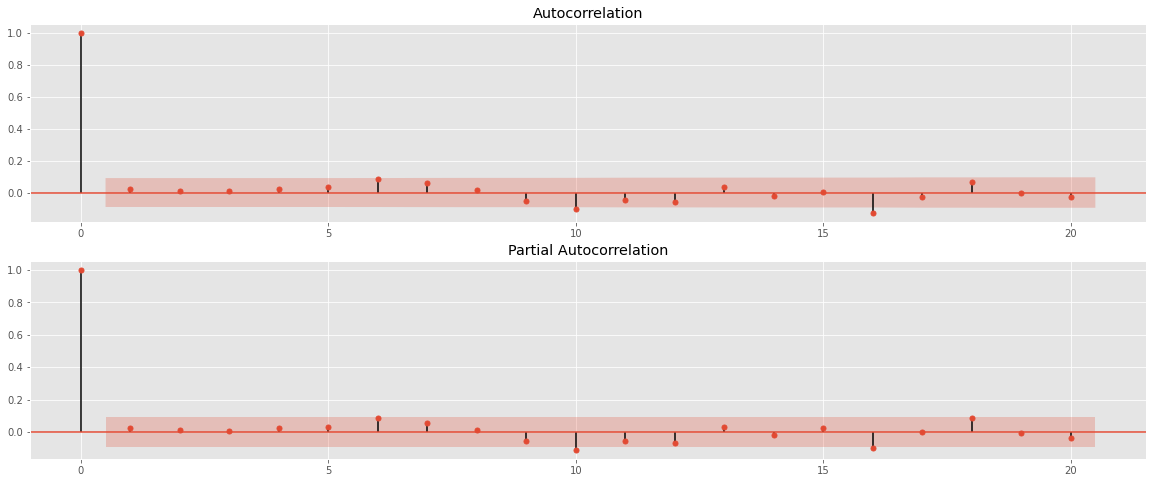

In [41]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_result.iloc[:,2],lags = 20, ax = ax1 )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_result.iloc[:,2], lags = 20, ax = ax2)

# ARIMA model

In [55]:
df_result = df_result.set_index('date')
df_result

,Coal_price,iron,Brent_fut,copper_fut,WTI_fut,WTI,LNG_fut,KPPI,ACPI,KCPI,...,India_Electricity from coal (TWh),India_Electricity from gas (TWh),India_Electricity from hydro (TWh),India_Electricity from other renewables including bioenergy (TWh),India_Electricity from solar (TWh),India_Electricity from oil (TWh),India_Electricity from wind (TWh),India_Electricity from nuclear (TWh),APPI,bdi
date,,,,,,,,,,,,,,,,,,,,,
2019-12-29,67.50,-1.86,-0.44,84.5,-1.33,-1.36,0.06,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1090.0
2019-12-22,66.55,0.19,-2.02,-39.0,-1.28,-1.30,3.99,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1123.0
2019-12-15,66.35,0.53,-0.92,-45.0,-0.37,-0.66,-1.95,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1355.0
2019-12-08,66.30,-3.71,-0.83,-140.0,-0.87,-0.67,3.88,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1558.0
2019-12-01,66.40,-3.88,-1.96,-126.0,-4.03,-3.75,3.71,-0.8,0.234,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-06,123.50,-4.50,-1.60,91.5,3.45,3.82,1.38,-0.6,-1.086,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008,1043.0
2011-01-30,127.00,-4.00,-0.41,-518.5,0.31,0.36,-1.11,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,1137.0
2011-01-23,130.35,-1.50,-1.82,-86.0,-0.23,-0.36,1.39,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,1370.0


In [44]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(df_result, order=(2,1,2))
model_fit = model.fit(disp = 0)

# predict
start_index = datetime(2019, 1, 1)
end_index = datetime(2019, 12, 31)
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

# 

# visualization
plt.figure(figsize=(22,8))
plt.plot(weather_bin.Date,weather_bin.MeanTemp,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("date")
plt.ylabel("Black coal")
plt.legend()

ValueError: ignored

In [59]:
# 다시 보니 정상성을 y값에 맞춰서 진행..뻘짓한듯